# About Dataset

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). 
After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). 
Then, they performed segmented outreach and communication for a different segment of customers. 
This strategy has work e exceptionally well for them. 
They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

# Importing Library

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
auto_train_ds = pd.read_csv("datasets/Train.csv", sep=",")
auto_test_ds = pd.read_csv("datasets/Test.csv", sep=",")
auto_ds = pd.concat([auto_train_ds, auto_test_ds])

auto_ds

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# Data Preliminary Exploration

In [5]:
#Checking a dataset sample

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format="{:,.2f}".format
auto_ds.sample(n=10, random_state=0)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5475,460394,Female,No,32,Yes,Healthcare,9.00,Low,3.00,Cat_6,D
1167,461798,Female,No,56,Yes,Artist,0.00,Low,1.00,Cat_6,A
3156,464976,Male,Yes,75,No,Lawyer,1.00,Low,1.00,Cat_4,D
124,462104,Male,Yes,39,No,Entertainment,9.00,Low,2.00,Cat_3,D
1158,464829,Male,No,22,No,Healthcare,9.00,Low,5.00,Cat_4,D
1509,464634,Female,No,32,Yes,Engineer,NaN,Low,9.00,Cat_4,D
3380,467670,Male,No,25,No,Engineer,NaN,Low,3.00,Cat_6,A
1495,462073,Female,No,36,Yes,Artist,6.00,Low,1.00,Cat_6,C
7372,463611,Male,No,62,Yes,Artist,0.00,Low,NaN,Cat_6,A
5476,460962,Male,Yes,55,Yes,Executive,9.00,High,4.00,Cat_6,C


In [6]:
#Checking dataset info by feature

auto_ds.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [7]:
#Checking the existence of zeros in rows

(auto_ds==0).sum(axis=0).to_excel("zeros_per_feature.xlsx")
(auto_ds==0).sum(axis=0)

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    3087
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

In [8]:
#Checking the existence of duplicated rows

auto_ds.duplicated().sum()

38

In [9]:
#Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = auto_ds["Segmentation"].value_counts()
auto_balancing["Count%"] = auto_ds["Segmentation"].value_counts()/auto_ds.shape[0]*100

auto_balancing

,Count,Count%
D,3027,28.30
A,2818,26.35
C,2442,22.83
B,2408,22.52


In [10]:
#Checking basic statistical data by feature

auto_ds.describe(include="all")

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,"10,695.00",10695,10505,"10,695.00",10593,10533,"9,597.00",10695,"10,247.00",10587,10695
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,5841,6163,NaN,6570,3318,NaN,6494,NaN,6910,3027
mean,"463,468.09",NaN,NaN,43.51,NaN,NaN,2.62,NaN,2.84,NaN,NaN
std,"2,600.97",NaN,NaN,16.77,NaN,NaN,3.39,NaN,1.54,NaN,NaN
min,"458,982.00",NaN,NaN,18.00,NaN,NaN,0.00,NaN,1.00,NaN,NaN
25%,"461,220.50",NaN,NaN,30.00,NaN,NaN,0.00,NaN,2.00,NaN,NaN
50%,"463,451.00",NaN,NaN,41.00,NaN,NaN,1.00,NaN,3.00,NaN,NaN
75%,"465,733.50",NaN,NaN,53.00,NaN,NaN,4.00,NaN,4.00,NaN,NaN


# Data Cleaning

In [11]:
#1
auto_ds.drop_duplicates(inplace=True)

#2
auto_ds["Work_Experience_to_Age_Ratio"] = auto_ds["Work_Experience"] / auto_ds["Age"]

#3
auto_ds["Ever_Married"].fillna("No", inplace=True)
auto_ds["Graduated"].fillna("No", inplace=True)
auto_ds.dropna(subset=["Profession"], inplace=True)
auto_ds["Family_Size"].fillna(auto_ds["Family_Size"].mean(), inplace=True)
auto_ds.dropna(subset=["Var_1"], inplace=True)
auto_ds["Work_Experience"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience"].fillna(auto_ds["Work_Experience"].sum() / auto_ds["Age"].sum() * auto_ds["Age"], inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].replace(0, np.nan, inplace=True)
auto_ds["Work_Experience_to_Age_Ratio"].fillna(auto_ds["Work_Experience"] / auto_ds["Age"], inplace=True)

#4
auto_ds.drop(["ID"], axis=1, inplace=True)

#5
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Gender"], prefix="Gender")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Ever_Married"], prefix="Ever_Married")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Graduated"], prefix="Graduated")], axis=1)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Profession"], prefix="Profession")], axis=1)
auto_ds["Spending_Score_Level"] = auto_ds["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1 #Label encoding
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Var_1"], prefix="Var_1")], axis=1)
#target variable for the ML model (label encoding)
auto_ds["Segmentation_Level"] = auto_ds["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))+1 #Label encoding
#target variable for the DL model (one-hot encoding)
auto_ds = pd.concat([auto_ds, pd.get_dummies(auto_ds["Segmentation"], prefix="Segmentation")], axis=1)
Segmentation_encoding_dl = np.asarray(auto_ds[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]]) #creating for the DL model the response variable through the concatenation of the created dummy columns, forming an array

#6
auto_ds["Age_Range"] = np.where(auto_ds.Age>=60, "60+", np.where(auto_ds.Age>=50, "50-60", np.where(auto_ds.Age>=40, "40-50", np.where(auto_ds.Age>=30, "30-40", np.where(auto_ds.Age>=18, "18-30", "18-")))))
auto_ds["Work_Experience_Range"] = np.where(auto_ds.Work_Experience>=10, "10+", np.where(auto_ds.Work_Experience>=5, "5-10", "0-5"))
auto_ds["Family_Size_Range"] = np.where(auto_ds.Family_Size>=6, "6+", np.where(auto_ds.Family_Size>=3, "3-6", "0-3"))
auto_ds["Work_Experience_to_Age_Ratio_Range"] = np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.5, "0.5+", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.4, "0.4-0.5", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.3, "0.3-0.4", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.2, "0.2-0.3", np.where(auto_ds.Work_Experience_to_Age_Ratio>=0.1, "0.1-0.2", "0+")))))

auto_ds.to_excel("auto_ds_clean.xlsx")

# Data Exploration

<AxesSubplot:xlabel='Work_Experience_to_Age_Ratio'>

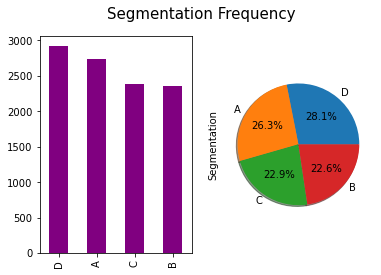

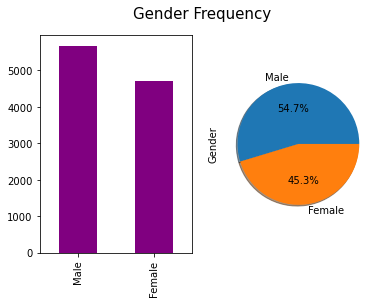

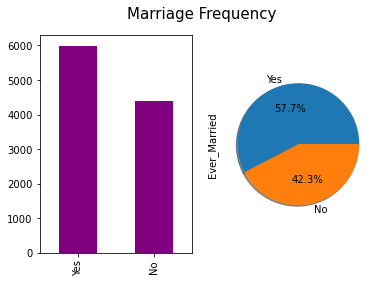

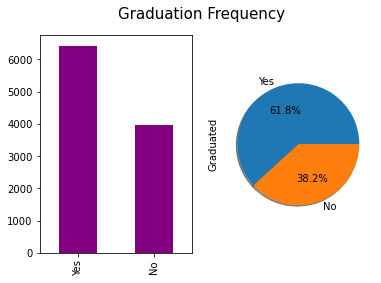

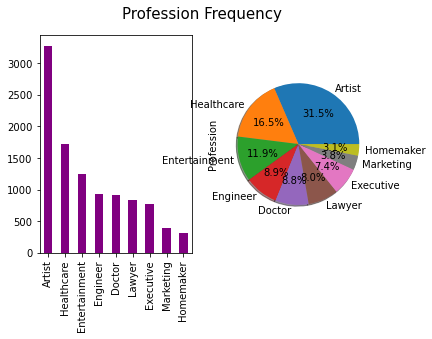

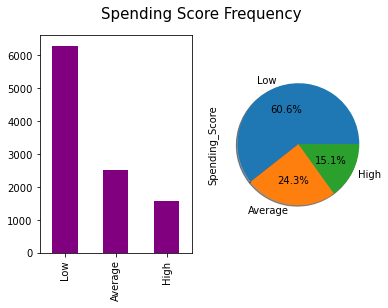

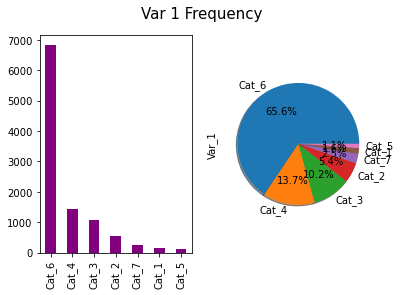

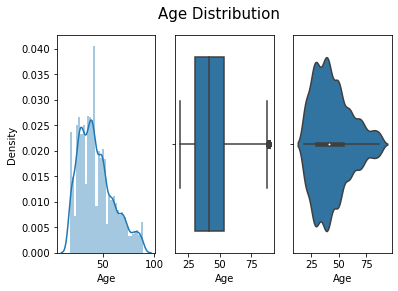

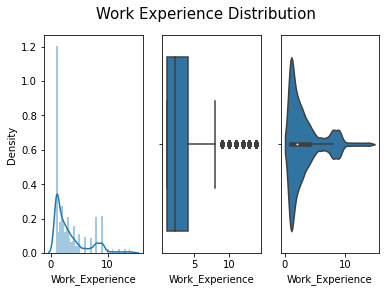

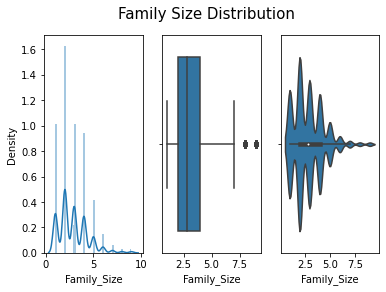

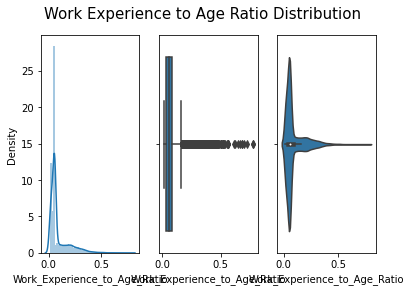

In [12]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
auto_ds["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
auto_ds["Var_1"].value_counts().plot.bar(color="purple", ax=ax[0])
auto_ds["Var_1"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Var 1 Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)


#Plotting Numerical Variables

fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(auto_ds["Age"], ax=ax[0])
sns.boxplot(auto_ds["Age"], ax=ax[1])
sns.violinplot(auto_ds["Age"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Family Size Distribution", fontsize=15)
sns.distplot(auto_ds["Family_Size"], ax=ax[0])
sns.boxplot(auto_ds["Family_Size"], ax=ax[1])
sns.violinplot(auto_ds["Family_Size"], ax=ax[2])

fig, ax = plt.subplots(1,3)
fig.suptitle("Work Experience to Age Ratio Distribution", fontsize=15)
sns.distplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[0])
sns.boxplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[1])
sns.violinplot(auto_ds["Work_Experience_to_Age_Ratio"], ax=ax[2])

# Correlations Analysis & Features Selection

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Work_Experience'),
  Text(0, 2.5, 'Family_Size'),
  Text(0, 3.5, 'Work_Experience_to_Age_Ratio'),
  Text(0, 4.5, 'Gender_Female'),
  Text(0, 5.5, 'Gender_Male'),
  Text(0, 6.5, 'Ever_Married_No'),
  Text(0, 7.5, 'Ever_Married_Yes'),
  Text(0, 8.5, 'Graduated_No'),
  Text(0, 9.5, 'Graduated_Yes'),
  Text(0, 10.5, 'Profession_Artist'),
  Text(0, 11.5, 'Profession_Doctor'),
  Text(0, 12.5, 'Profession_Engineer'),
  Text(0, 13.5, 'Profession_Entertainment'),
  Text(0, 14.5, 'Profession_Executive'),
  Text(0, 15.5, 'Profession_Healthcare'),
  Text(0, 16.5, 'Profession_Homemaker'),
  Text(0, 17.5, 'Profession_Lawyer'),
  Text(0, 18.5, 'Profession_Marketing'),
  Text(0, 19.5, 'Spending_Score_Level'),
  Text(0, 20.5, 'Var_1_Cat_1'),
  Text(0

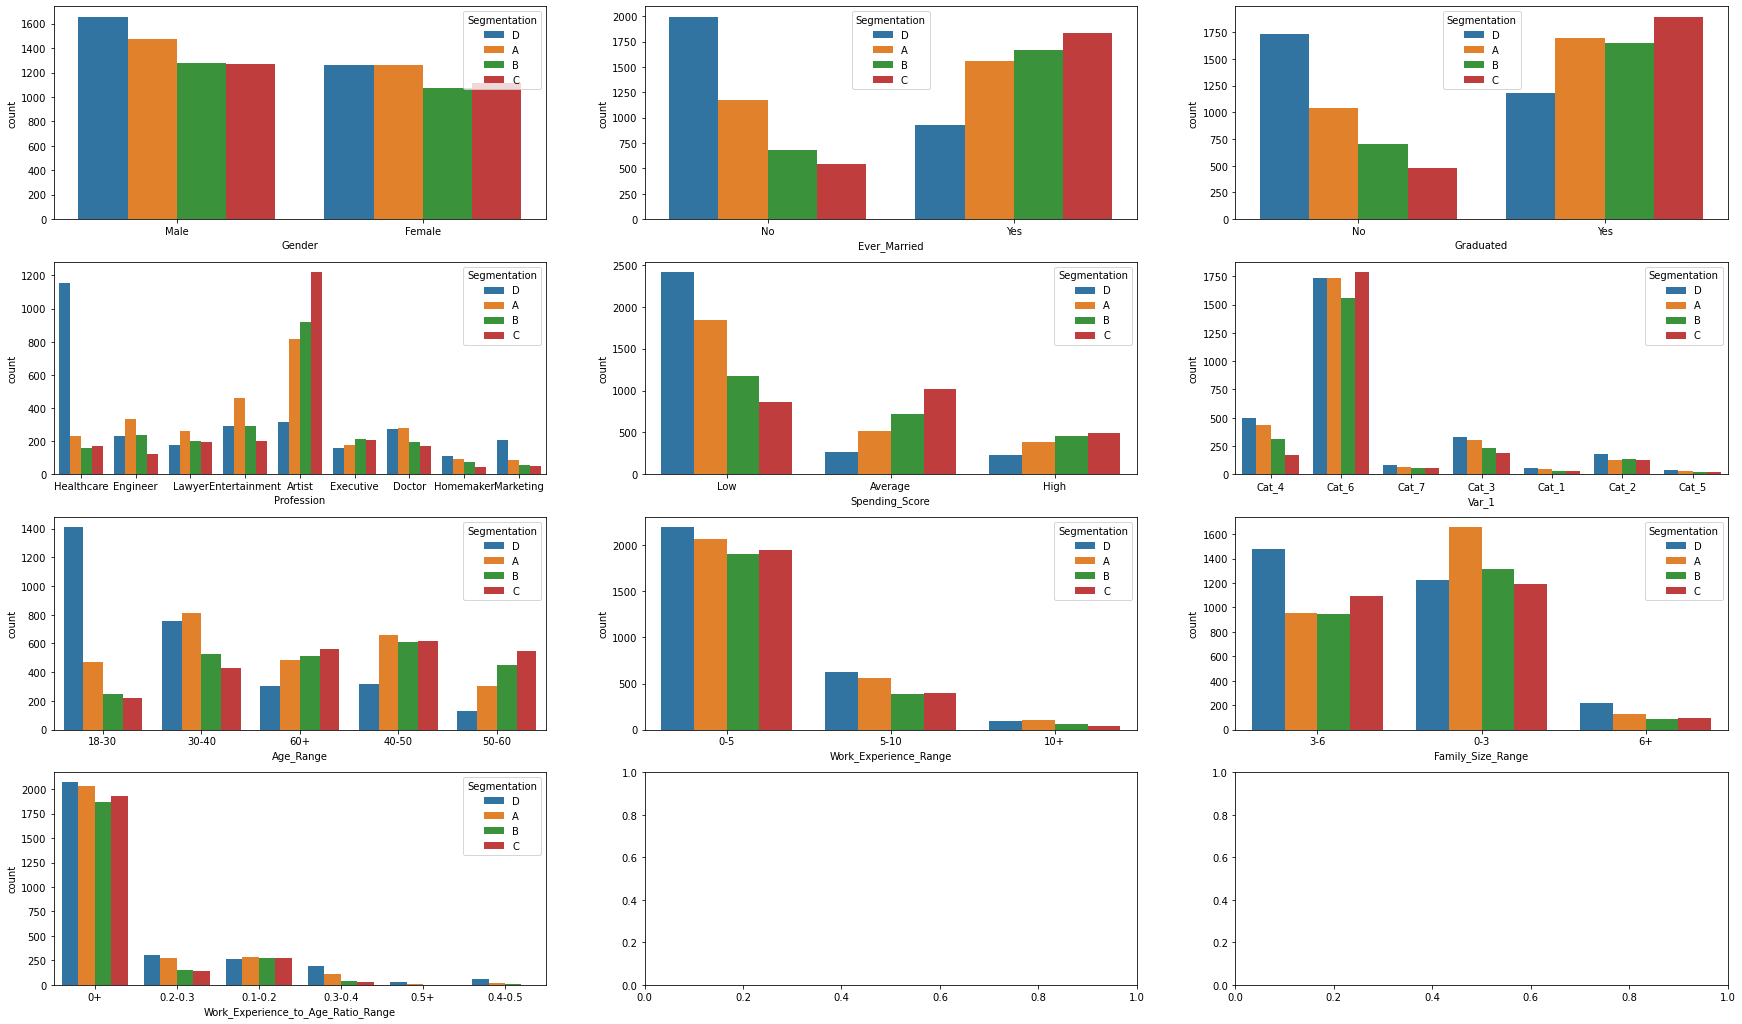

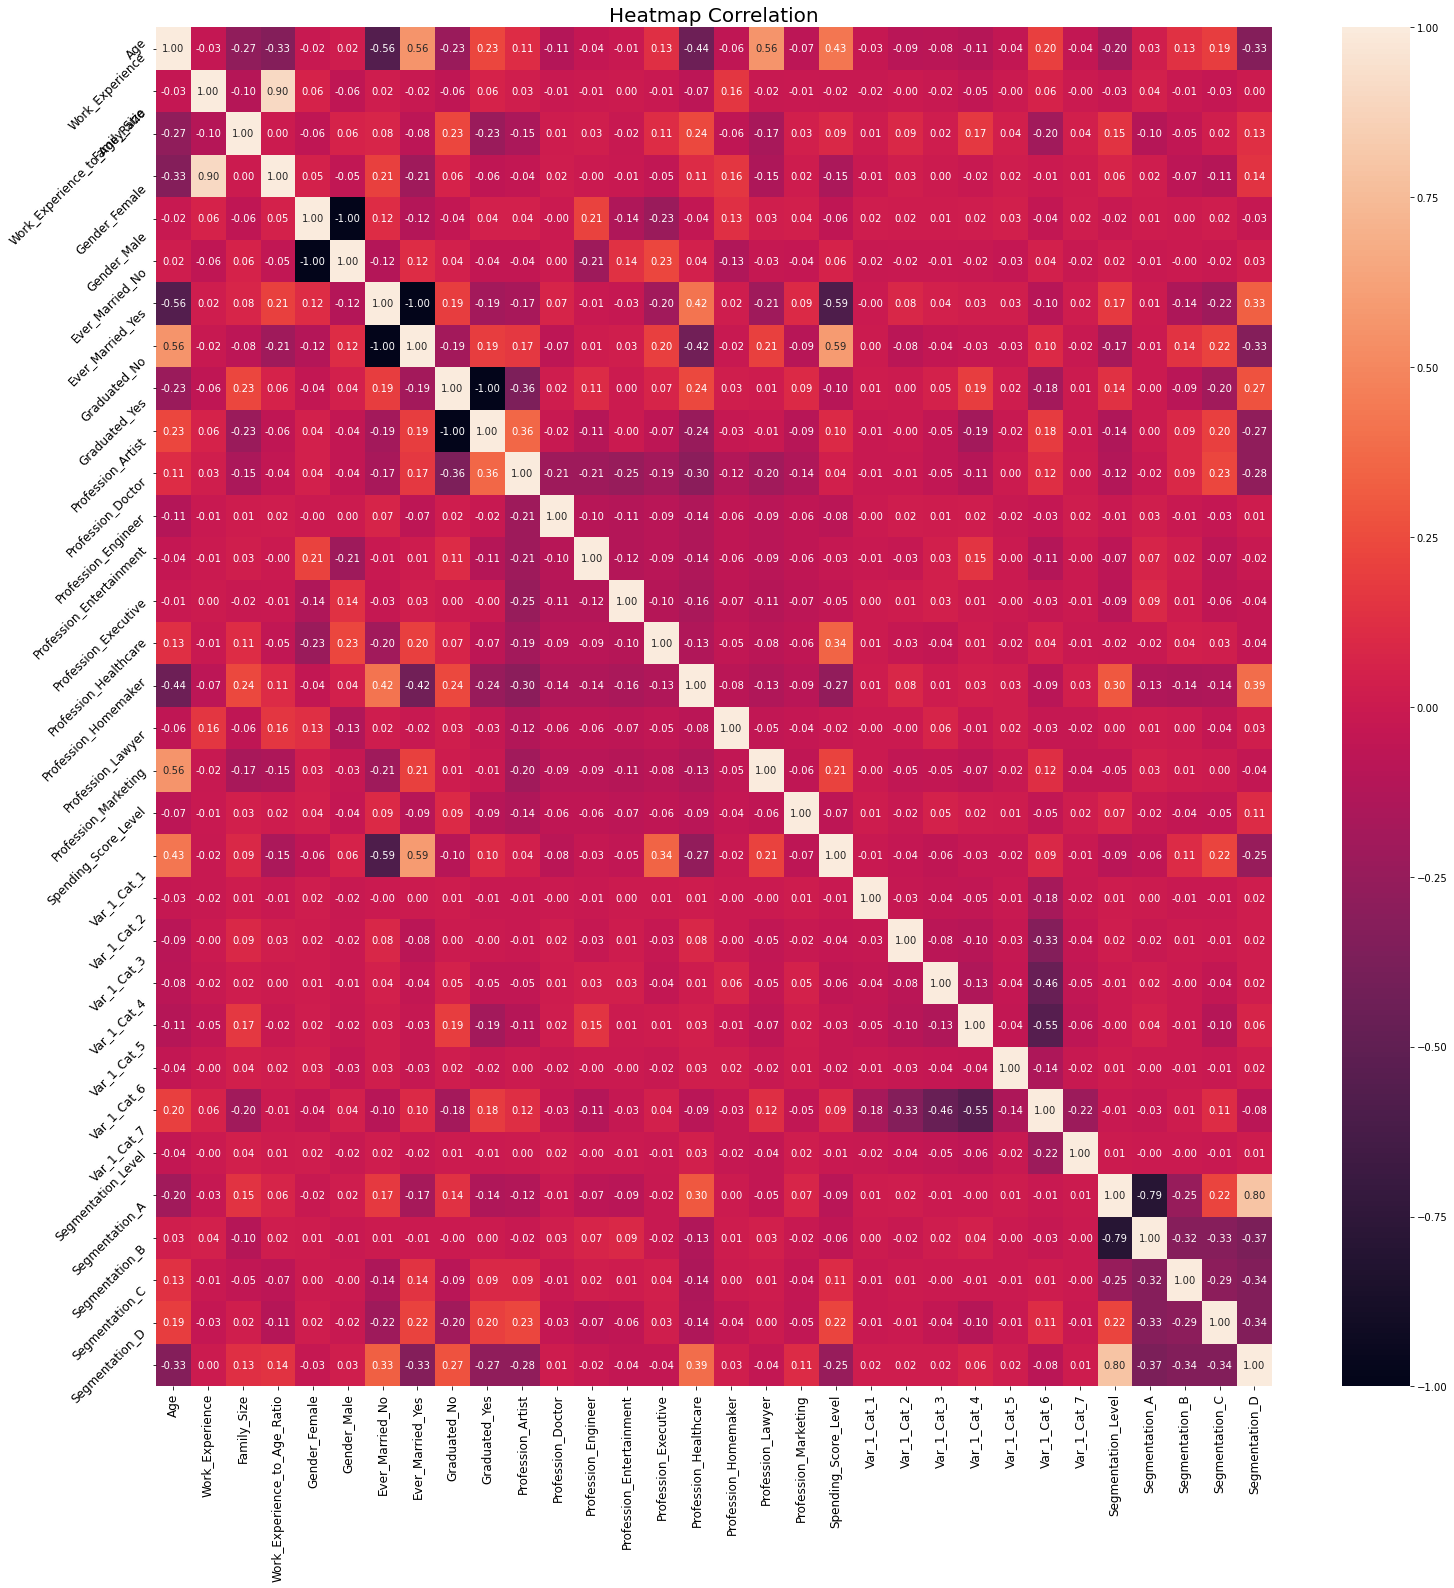

In [13]:
#Plotting Bar Charts, also considering all numerical to categorical variables created at the step before

fig, axarr = plt.subplots(4, 3, figsize=(30, 18))
sns.countplot(x="Gender", hue = "Segmentation", data = auto_ds, ax=axarr[0][0])
sns.countplot(x="Ever_Married", hue = "Segmentation", data = auto_ds, ax=axarr[0][1])
sns.countplot(x="Graduated", hue = "Segmentation", data = auto_ds, ax=axarr[0][2])
sns.countplot(x="Profession", hue = "Segmentation", data = auto_ds, ax=axarr[1][0])
sns.countplot(x="Spending_Score", hue = "Segmentation", data = auto_ds, ax=axarr[1][1])
sns.countplot(x="Var_1", hue = "Segmentation", data = auto_ds, ax=axarr[1][2])
sns.countplot(x="Age_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][0])
sns.countplot(x="Work_Experience_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][1])
sns.countplot(x="Family_Size_Range", hue = "Segmentation", data = auto_ds, ax=axarr[2][2])
sns.countplot(x="Work_Experience_to_Age_Ratio_Range", hue = "Segmentation", data = auto_ds, ax=axarr[3][0])

#Deleting original categorical columns

auto_ds.drop(["Segmentation", "Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Age_Range",
              "Work_Experience_Range", "Family_Size_Range", "Work_Experience_to_Age_Ratio_Range"], axis=1, inplace=True)

#Plotting a Heatmap

fig, ax = plt.subplots(1, figsize=(25,25))
sns.heatmap(auto_ds.corr(), annot=True, fmt=",.2f")
plt.title("Heatmap Correlation", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

#Plotting a Pairplot

# sns.pairplot(auto_ds)

Feature:Age, Score:0.0242
Feature:Work_Experience, Score:0.0036
Feature:Family_Size, Score:0.0038
Feature:Work_Experience_to_Age_Ratio, Score:0.0051
Feature:Gender_Female, Score:0.0007
Feature:Gender_Male, Score:0.0006
Feature:Ever_Married_No, Score:0.0049
Feature:Ever_Married_Yes, Score:0.0063
Feature:Graduated_No, Score:0.0043
Feature:Graduated_Yes, Score:0.0049
Feature:Profession_Artist, Score:0.0088
Feature:Profession_Doctor, Score:0.0004
Feature:Profession_Engineer, Score:0.0006
Feature:Profession_Entertainment, Score:0.0007
Feature:Profession_Executive, Score:0.0004
Feature:Profession_Healthcare, Score:0.0097
Feature:Profession_Homemaker, Score:0.0002
Feature:Profession_Lawyer, Score:0.0003
Feature:Profession_Marketing, Score:0.0010
Feature:Spending_Score_Level, Score:0.0097
Feature:Var_1_Cat_1, Score:0.0001
Feature:Var_1_Cat_2, Score:0.0003
Feature:Var_1_Cat_3, Score:0.0004
Feature:Var_1_Cat_4, Score:0.0008
Feature:Var_1_Cat_5, Score:0.0001
Feature:Var_1_Cat_6, Score:0.0008
Feat

<AxesSubplot:>

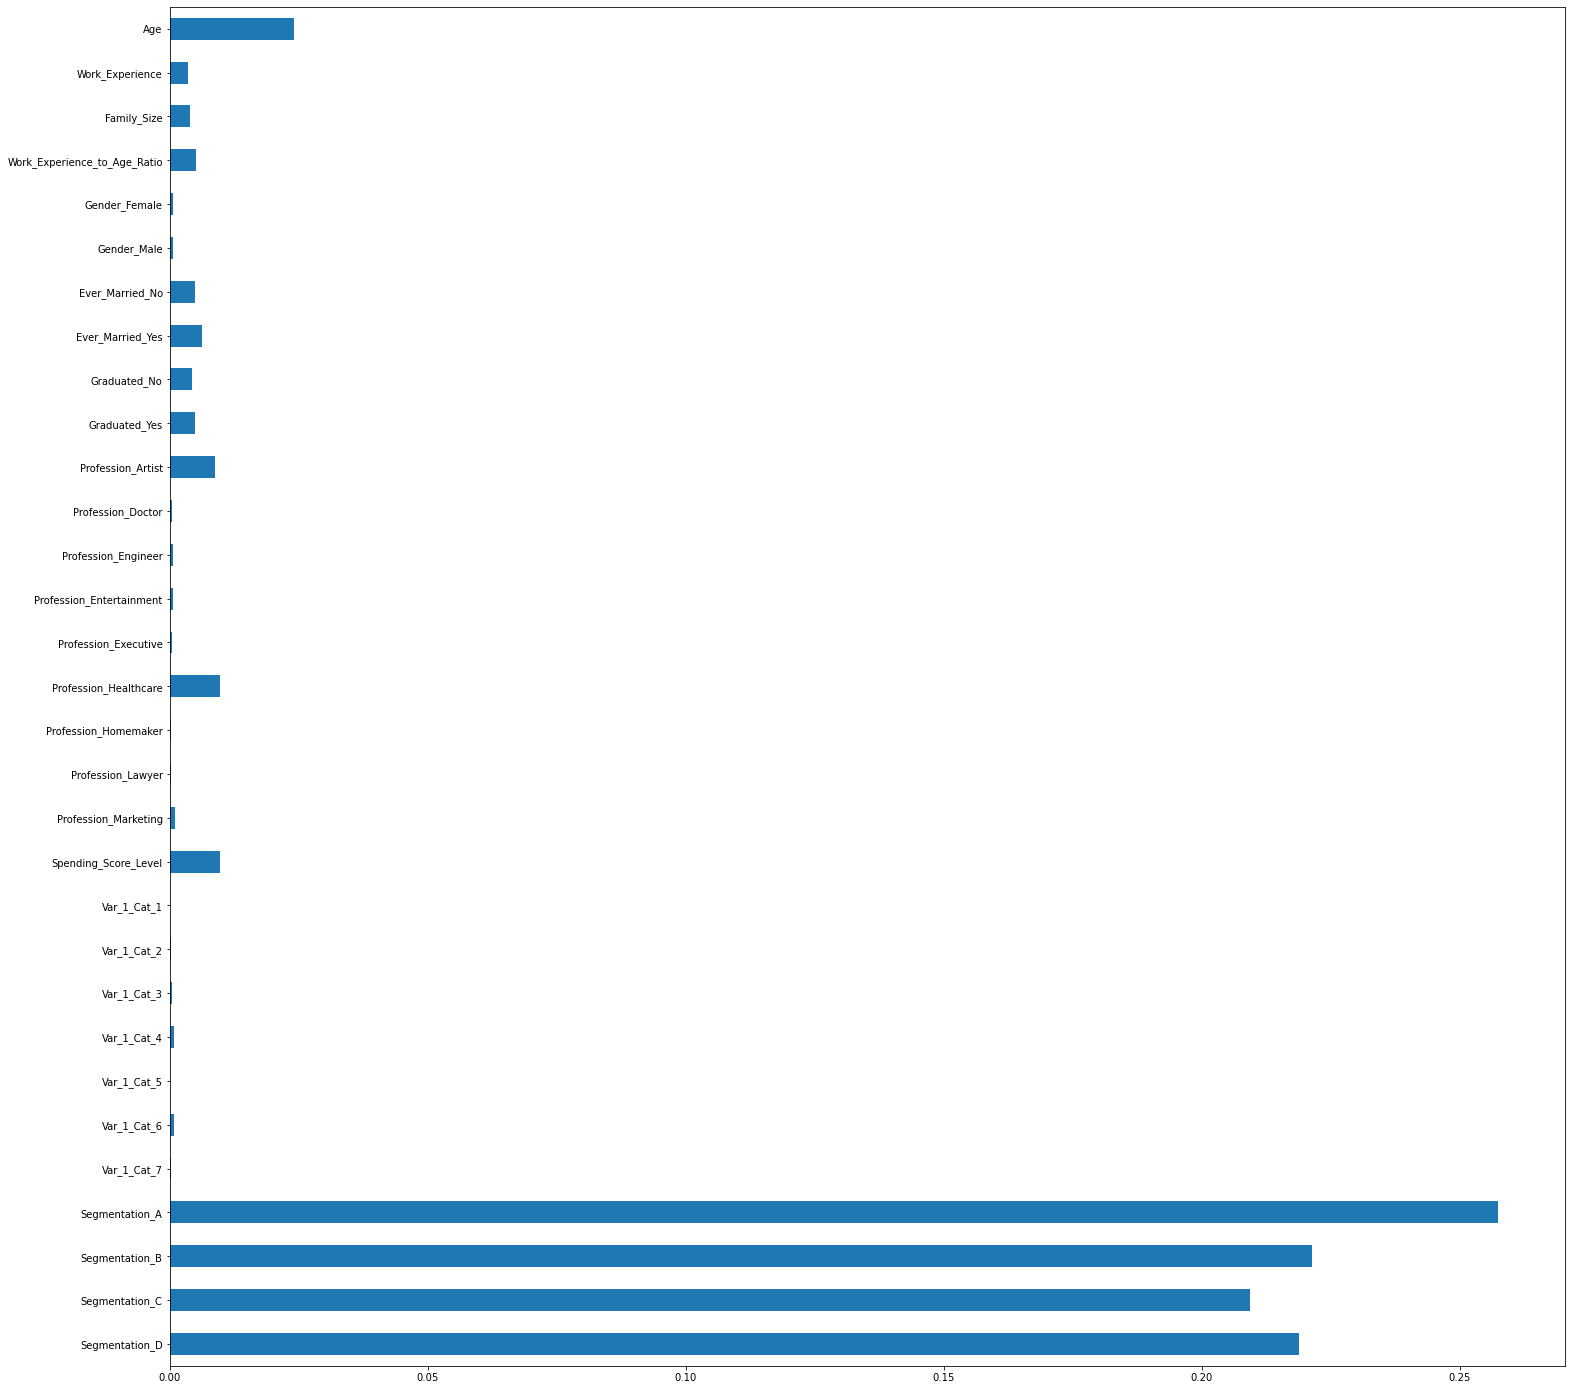

In [14]:
#Plotting a Feature Importance

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
#Defining Xs and y
X = auto_ds.drop(["Segmentation_Level"], axis=1)
y = auto_ds["Segmentation_Level"]
#Defining the model
model = RandomForestClassifier().fit(X, y)
#Getting importance
importance = model.feature_importances_
#Summarizing feature importance
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v))
#Plotting feature importance
pd.Series(model.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(25,25))

# Data Modelling

In [15]:
#Defining Xs and y

X = auto_ds[["Age", "Family_Size", "Profession_Healthcare", "Profession_Entertainment", "Profession_Artist", "Ever_Married_Yes",
             "Graduated_No", "Spending_Score_Level"]]
y = auto_ds["Segmentation_Level"]
y_dl = Segmentation_encoding_dl #for the DL model

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

#Setting train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_scaled, y_dl, random_state=0) #for the DL model

# 1. Machine Learning Algorithms Implementation & Assessment

# Logistic Regression

Testing degrees:
Train: Degree:1, Accuracy:0.449, Precision:0.430, Recall:0.449, F1:0.425
Test : Degree:1, Accuracy:0.457, Precision:0.446, Recall:0.457, F1:0.436
Train: Degree:2, Accuracy:0.479, Precision:0.473, Recall:0.479, F1:0.470
Test : Degree:2, Accuracy:0.471, Precision:0.465, Recall:0.471, F1:0.461
Train: Degree:3, Accuracy:0.491, Precision:0.484, Recall:0.491, F1:0.485
Test : Degree:3, Accuracy:0.472, Precision:0.463, Recall:0.472, F1:0.464

Linear Regression Intercept: [ 0.7463916  -0.72139106 -1.15798141  1.13298087]
Linear Regression Coefficients: [[ 2.46445344e-03 -1.27811017e+00 -1.09344388e+00 -2.94546643e-01
   3.42654442e-01  5.08113832e-02  1.12380811e-01 -1.29389376e-02
  -6.45672567e-01  1.35905605e+00  5.47828492e-01  7.82856264e-01
   1.30975432e-01 -3.08293121e-01 -7.78539500e-01  1.79837882e-01
   1.19489711e-01  4.34401792e-01  1.21644307e-01 -8.64652298e-01
   3.38938546e-01  4.00245431e-01 -1.97556978e-01 -1.76757538e-01
  -2.94546643e-01  0.00000000e+00  0.

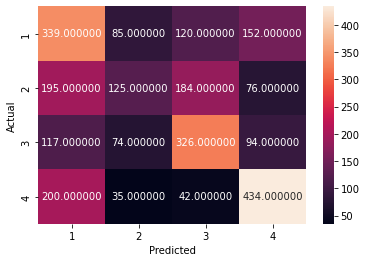

In [16]:
#Creating a Logistic Regression model and checking its Metrics

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#Trying different polynomial degrees
degrees = [1, 2, 3]
print("Testing degrees:")
for a in degrees:
    poly = PolynomialFeatures(degree=a)
    X_train_degree = poly.fit_transform(X_train)
    X_test_degree = poly.fit_transform(X_test)
    model_lr = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
    y_preds_train = model_lr.predict(X_train_degree)
    y_preds_test = model_lr.predict(X_test_degree)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best polynomial degree
chosen_degree = 2
poly = PolynomialFeatures(degree=chosen_degree)

#Working on X_train & X_test in the polynomial chosen degree
X_train_degree = poly.fit_transform(X_train)
X_test_degree = poly.fit_transform(X_test)

#Fitting to the model
model_lr = linear_model.LogisticRegression(max_iter=1000000000).fit(X_train_degree, y_train.values.ravel())
print(f"Linear Regression Intercept: {model_lr.intercept_}")
print(f"Linear Regression Coefficients: {model_lr.coef_}, \n")

#Getting the predictions & Metrics
y_preds_train = model_lr.predict(X_train_degree)
y_preds_test = model_lr.predict(X_test_degree)
accuracy_trainL = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen degree:")
print("Train: Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_trainL, precision_train, recall_train, f1_train))
print("Test : Degree:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_degree, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
X_degree = poly.fit_transform(X_scaled)
y_preds_all = model_lr.predict(X_degree)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_lr.xlsx")

In [17]:
L=("{:.3f}".format(accuracy_trainL))

# SVM

Train: Accuracy:0.473, Precision:0.468, Recall:0.473, F1:0.468
Test : Accuracy:0.464, Precision:0.455, Recall:0.464, F1:0.455

Confusion matrix:
Predicted    1    2    3    4
Actual                       
1          324  105  109  158
2          197  131  173   79
3          107   99  310   95
4          188   31   52  440, 



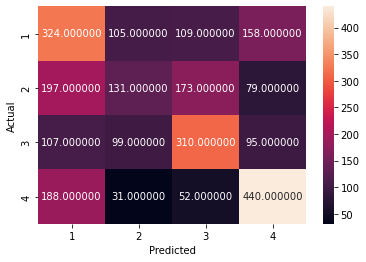

In [18]:
#Creating a SVM model and checking its Metrics

from sklearn import svm

#Fitting to the model
model_svm = svm.SVC().fit(X_train, y_train)

#Getting the predictions & Metrics
y_preds_train = model_svm.predict(X_train)
y_preds_test = model_svm.predict(X_test)
accuracy_trainS = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_trainS, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_svm.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_svm.xlsx")

In [19]:
S=("{:.3f}".format(accuracy_trainS))

# Naive Bayes

Train: Accuracy:0.432, Precision:0.422, Recall:0.432, F1:0.381
Test : Accuracy:0.436, Precision:0.477, Recall:0.436, F1:0.383

Confusion matrix:
Predicted    1  2    3    4
Actual                     
1          284  0  237  175
2          211  3  281   85
3          126  1  389   95
4          164  1   89  457, 



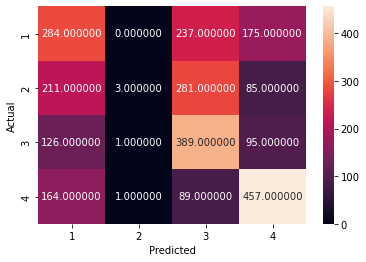

In [20]:
#Creating a Naive Bayes model and checking its Metrics

from sklearn import naive_bayes

#Fitting to the model
model_nb = naive_bayes.MultinomialNB().fit(X_train, y_train)

#Getting the predictions & Metrics
y_preds_train = model_nb.predict(X_train)
y_preds_test = model_nb.predict(X_test)
accuracy_trainNB = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_trainNB, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_nb.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_nb.xlsx")

In [21]:
NS=("{:.3f}".format(accuracy_trainNS))

NameError: name 'accuracy_trainNS' is not defined

# KNN

In [ ]:
#Creating a KNN model and checking its Metrics

from sklearn import neighbors

#Trying different neighbors
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print("Testing neighbors:")
for a in n_neighbors:
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=a).fit(X_train, y_train)
    y_preds_train = model_knn.predict(X_train)
    y_preds_test = model_knn.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best neighbor
chosen_neighbor = 10
model_knn = neighbors.KNeighborsClassifier(n_neighbors=chosen_neighbor).fit(X_train, y_train)
y_preds_train = model_knn.predict(X_train)
y_preds_test = model_knn.predict(X_test)
accuracy_trainKN = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen neighbors:")
print("Train: Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_trainKN, precision_train, recall_train, f1_train))
print("Test : Neighbors:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_neighbor, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_knn.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_knn.xlsx")

In [ ]:
KN =("{:.3f}".format(accuracy_trainKN))

# Desicion Tree

In [ ]:

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_rf = DecisionTreeClassifier(max_depth=a, random_state=0).fit(X_train, y_train)
    y_preds_train = model_rf.predict(X_train)
    y_preds_test = model_rf.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 5
model_rf = DecisionTreeClassifier(max_depth=chosen_depth, random_state=0).fit(X_train, y_train)
y_preds_train = model_rf.predict(X_train)
y_preds_test = model_rf.predict(X_test)
accuracy_trainDT = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_trainDT, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_rf.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_rf.xlsx")

In [ ]:
DT =("{:.3f}".format(accuracy_trainDT))

# Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Decision Tree', 'MultinomialNB'], 
                        'Accuracy': [L, KN, S, 
                                     DT, NS]})
compare.sort_values(by='Accuracy', ascending=False)

# 2. Ensemble Learning

In [ ]:
auto_test_ds.head()

Testing depths:
Train: Depth:1, Accuracy:0.444, Precision:0.342, Recall:0.444, F1:0.385
Test : Depth:1, Accuracy:0.443, Precision:0.343, Recall:0.443, F1:0.386
Train: Depth:2, Accuracy:0.463, Precision:0.441, Recall:0.463, F1:0.435
Test : Depth:2, Accuracy:0.458, Precision:0.433, Recall:0.458, F1:0.430
Train: Depth:3, Accuracy:0.471, Precision:0.455, Recall:0.471, F1:0.451
Test : Depth:3, Accuracy:0.462, Precision:0.443, Recall:0.462, F1:0.441
Train: Depth:4, Accuracy:0.482, Precision:0.472, Recall:0.482, F1:0.470
Test : Depth:4, Accuracy:0.462, Precision:0.444, Recall:0.462, F1:0.447
Train: Depth:5, Accuracy:0.488, Precision:0.480, Recall:0.488, F1:0.479
Test : Depth:5, Accuracy:0.470, Precision:0.456, Recall:0.470, F1:0.458
Train: Depth:6, Accuracy:0.499, Precision:0.493, Recall:0.499, F1:0.491
Test : Depth:6, Accuracy:0.472, Precision:0.458, Recall:0.472, F1:0.460
Train: Depth:7, Accuracy:0.514, Precision:0.508, Recall:0.514, F1:0.506
Test : Depth:7, Accuracy:0.473, Precision:0.461,

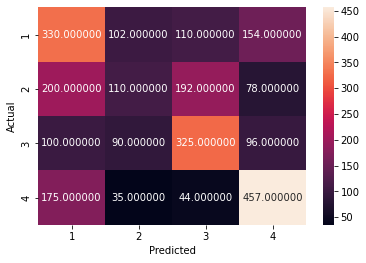

In [22]:
#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_rf = RandomForestClassifier(max_depth=a, random_state=0).fit(X_train, y_train)
    y_preds_train = model_rf.predict(X_train)
    y_preds_test = model_rf.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

#Choosing the best depth
chosen_depth = 5
model_rf = RandomForestClassifier(max_depth=chosen_depth, random_state=0).fit(X_train, y_train)
y_preds_train = model_rf.predict(X_train)
y_preds_test = model_rf.predict(X_test)
accuracy_trainDT = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_trainDT, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_rf.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_rf.xlsx")